**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
data = pd.read_csv("datasets/IMDB_reviews_Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape

(50000, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.duplicated().sum()

418

In [6]:
#removing duplicates
data = data[~data.duplicated()]
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(49582, 2)

In [9]:
#converting categorical data 
data['sentiment'] = data['sentiment'].replace({'positive':1,"negative":0})
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
data['sentiment'].value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

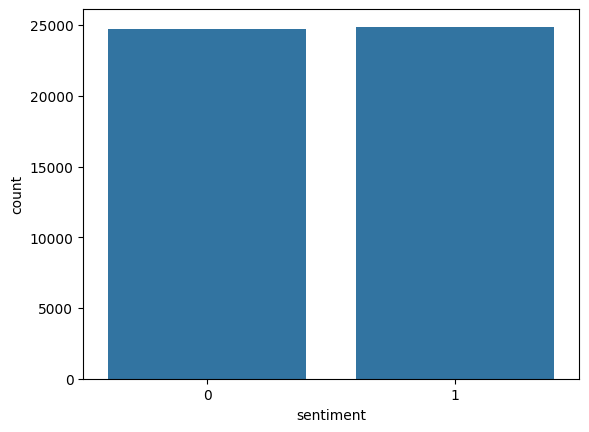

In [11]:

sns.countplot(x='sentiment',data = data)
plt.show()

In [12]:
data["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [13]:
#data pre processing
import re

def preprocess(text):
    "removine html tags <br /> "
    soup = BeautifulSoup(text,"html.parser")
    text =  soup.get_text()
    text = re.sub("[^a-zA-Z]"," ",text)

    
    return text

In [14]:
data['review'] = [preprocess(i) for i in data['review']]

In [15]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer =  PorterStemmer()
data['review'].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)]))

0        one of the other review ha mention that after ...
1        a wonder littl product the film techniqu is ve...
2        i thought thi wa a wonder way to spend time on...
3        basic there s a famili where a littl boy jake ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought thi movi did a down right good job i...
49996    bad plot bad dialogu bad act idiot direct the ...
49997    i am a cathol taught in parochi elementari sch...
49998    i m go to have to disagre with the previou com...
49999    no one expect the star trek movi to be high ar...
Name: review, Length: 49582, dtype: object

In [16]:
data["review"][1]

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

Text(0.5, 1.0, 'Words in Positive Reviews')

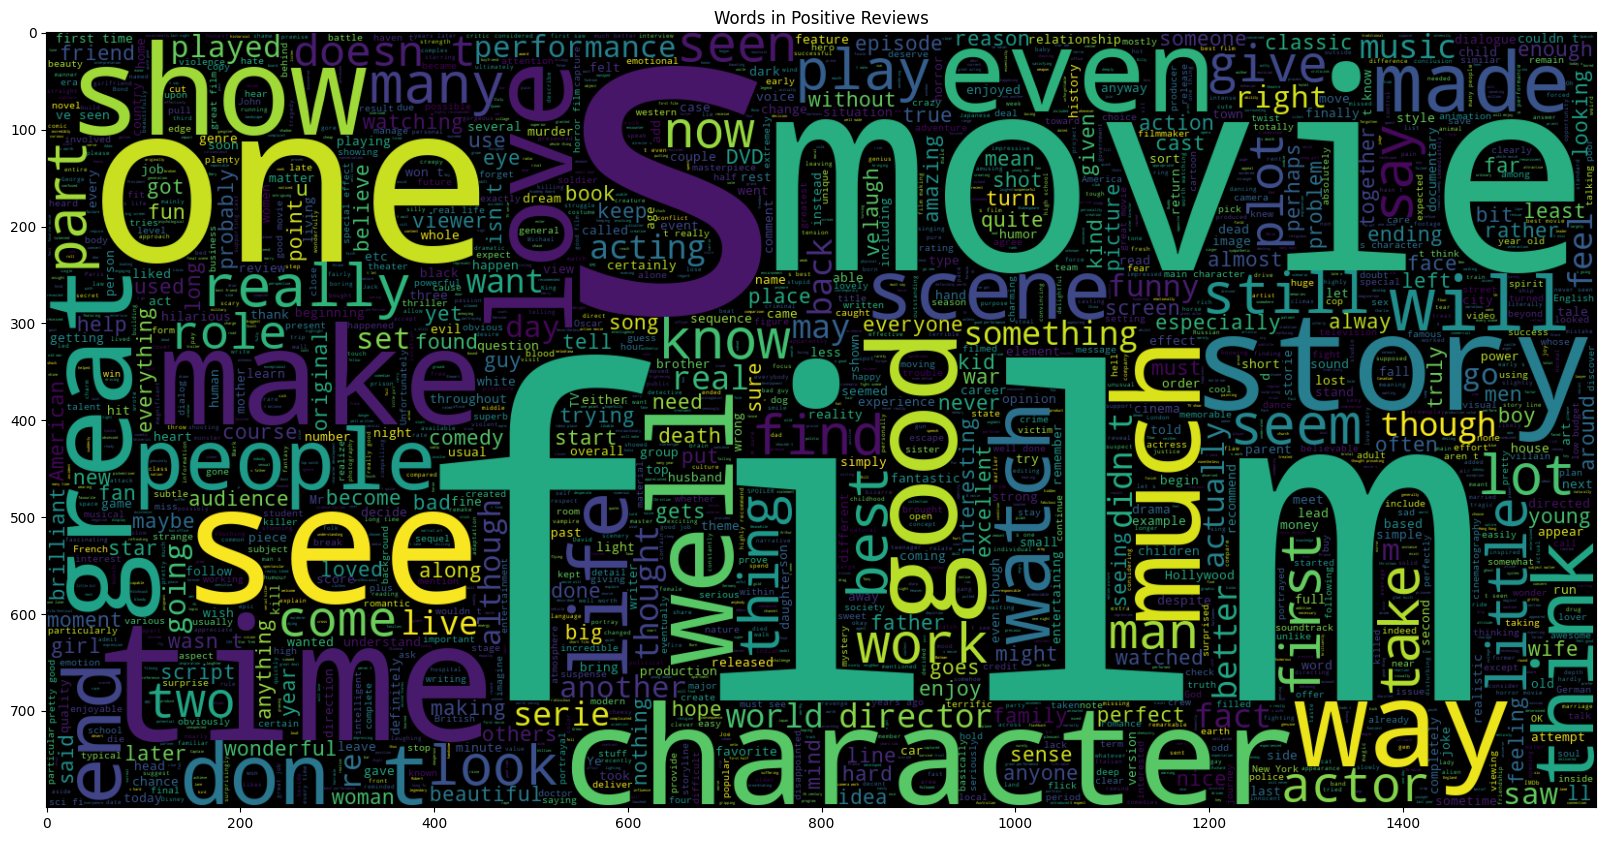

In [17]:
# plotting words in positive reviews
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 ,width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 1].review))
plt.imshow(wc ,  interpolation ="bilinear")
plt.title("Words in Positive Reviews")

Text(0.5, 1.0, 'Words in Negative Reviews')

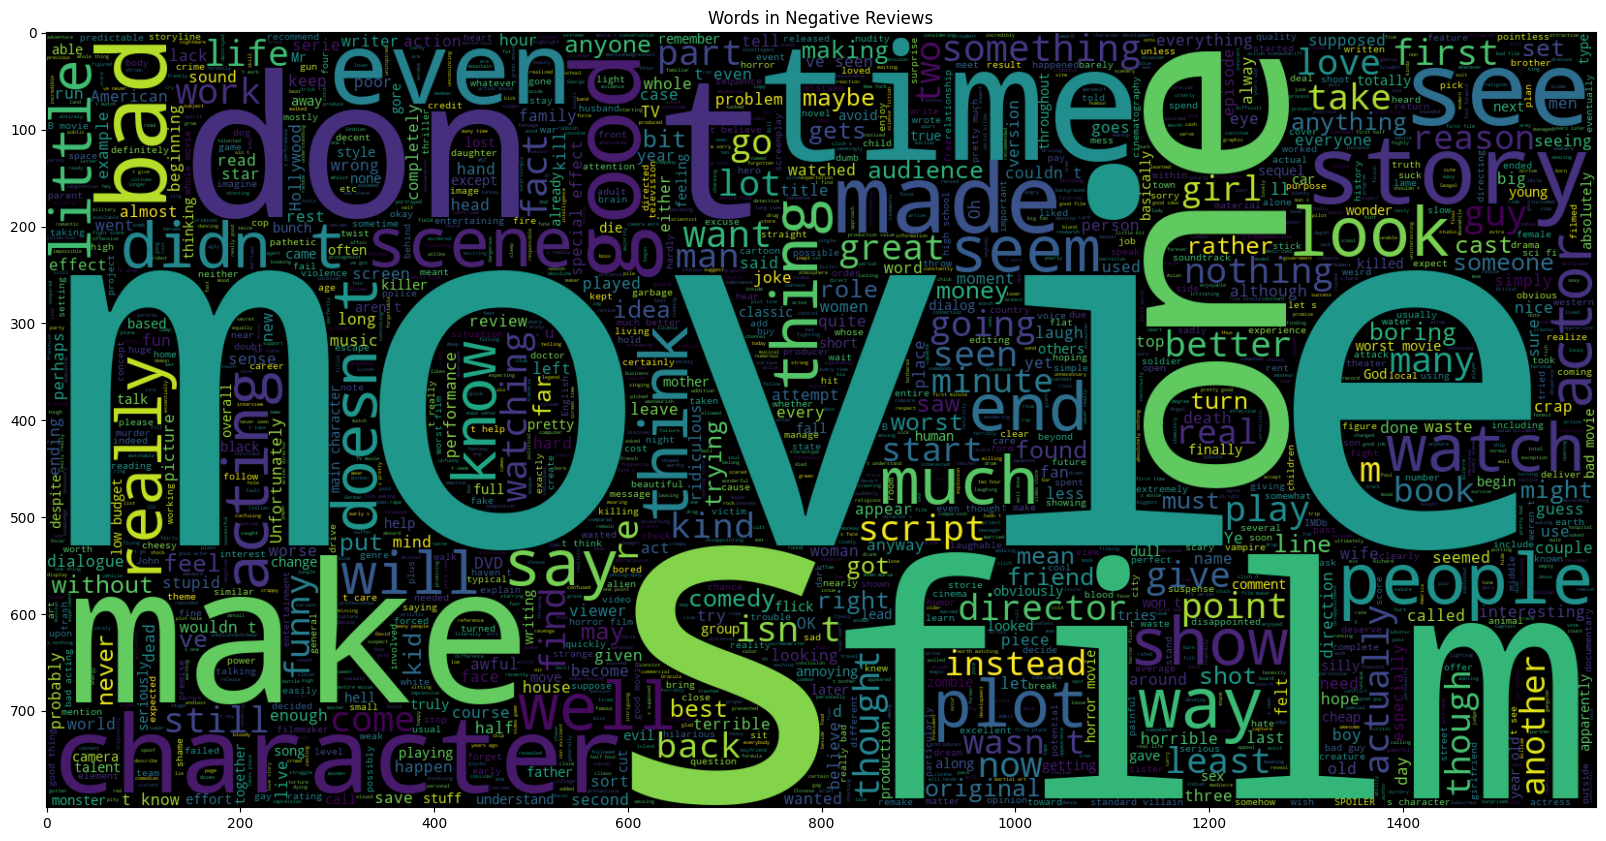

In [18]:
# plotting words in negative reviews
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 ,width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 0].review))
plt.imshow(wc ,  interpolation ="bilinear")
plt.title("Words in Negative Reviews")

In [19]:
#splitting dependent and target variables

X=data["review"]

y = data["sentiment"]


In [20]:
#importing nltk library ,TF-IDF

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



vectorizer = TfidfVectorizer(max_features = 5000,stop_words = "english")

#vectorizing the reviews
x= vectorizer.fit_transform(X).toarray()

#splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [21]:
#multinomial model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train , y_train)

MultinomialNB()

In [22]:
pred = mnb.predict(X_test)
pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("MultinomialNB",confusion_matrix(y_test,pred))
print("MultinomialNB",accuracy_score(y_test,pred))

MultinomialNB [[4146  793]
 [ 688 4290]]
MultinomialNB 0.8506604820006051


In [24]:
#testing the model
def test_model(review):
    sentence = vectorizer.transform([review]).toarray()
    result = mnb.predict(sentence)[0]
    
    if result:
        return "positive"
    else:
        return "negative"

In [25]:
rev = "this is boring movie of my life"
print(test_model(rev))

negative


In [26]:
#Logistic model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train , y_train)
l_pred = LR.predict(X_test)
l_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
print("LogisticRegression",confusion_matrix(y_test,l_pred))
print("LogisticRegression",accuracy_score(y_test,l_pred))

LogisticRegression [[4297  642]
 [ 505 4473]]
LogisticRegression 0.8843400221841282


In [28]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)
dt_pred = DT.predict(X_test)
dt_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
print("DecisionTreeClassifier",confusion_matrix(y_test,dt_pred))
print("DecisionTreeClassifier",accuracy_score(y_test,dt_pred))

DecisionTreeClassifier [[3531 1408]
 [1437 3541]]
DecisionTreeClassifier 0.7131188867601089


In [30]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train , y_train)
rf_pred = RF.predict(X_test)
rf_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
print("RandomForestClassifier",confusion_matrix(y_test,rf_pred))
print("RandomForestClassifier",accuracy_score(y_test,rf_pred))

RandomForestClassifier [[4155  784]
 [ 843 4135]]
RandomForestClassifier 0.8359382877886458


In [ ]:

import pickle

pickle.dump(vectorizer,open("Tfidfvec.pkl","wb"))
pickle.dump(mnb,open("reviews_classifier.pkl","wb"))
#pickle.dump(LR,open("LR_reviews_classifier.pkl","wb"))